In [ ]:
# this will ask you to authenticate with Google
from google.colab import drive
drive.mount('/content/drive')
 
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Uny/DMT/Assignment 2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
#Read the training data from the provided file and save it in the variable dataset as a DataFrame object
dataset = pd.read_csv("datasets/training_set_VU_DM.csv")
dataset

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,1,1.61,0.0471,0.00,2,118.00,0,16974,1,21,3,0,1,0,NaN,550.92,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958343,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,1,1.95,0.1520,0.00,3,89.00,0,16974,1,21,3,0,1,0,NaN,553.14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958344,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,1,1.10,0.0164,0.00,4,99.00,0,16974,1,21,3,0,1,0,NaN,544.43,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958345,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,1,1.95,0.0662,0.00,1,139.00,0,16974,1,21,3,0,1,0,NaN,550.38,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,157.84,1


In [ ]:
#Obtain the frequency of the number of missing value for each column
freq_of_missing_values = dataset.isnull().sum() / len(dataset)
freq_of_missing_values

srch_id                        0.000000
date_time                      0.000000
site_id                        0.000000
visitor_location_country_id    0.000000
visitor_hist_starrating        0.949204
visitor_hist_adr_usd           0.948977
prop_country_id                0.000000
prop_id                        0.000000
prop_starrating                0.000000
prop_review_score              0.001485
prop_brand_bool                0.000000
prop_location_score1           0.000000
prop_location_score2           0.219902
prop_log_historical_price      0.000000
position                       0.000000
price_usd                      0.000000
promotion_flag                 0.000000
srch_destination_id            0.000000
srch_length_of_stay            0.000000
srch_booking_window            0.000000
srch_adults_count              0.000000
srch_children_count            0.000000
srch_room_count                0.000000
srch_saturday_night_bool       0.000000
srch_query_affinity_score      0.935986


In [ ]:
#Obtain the columns that have more than 10% of theier data missing 
cuttof_value = 0.1
attributes_to_del = freq_of_missing_values[freq_of_missing_values > cuttof_value].axes[0].tolist()
attributes_to_del

['visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_location_score2',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'comp1_rate',
 'comp1_inv',
 'comp1_rate_percent_diff',
 'comp2_rate',
 'comp2_inv',
 'comp2_rate_percent_diff',
 'comp3_rate',
 'comp3_inv',
 'comp3_rate_percent_diff',
 'comp4_rate',
 'comp4_inv',
 'comp4_rate_percent_diff',
 'comp5_rate',
 'comp5_inv',
 'comp5_rate_percent_diff',
 'comp6_rate',
 'comp6_inv',
 'comp6_rate_percent_diff',
 'comp7_rate',
 'comp7_inv',
 'comp7_rate_percent_diff',
 'comp8_rate',
 'comp8_inv',
 'comp8_rate_percent_diff',
 'gross_bookings_usd']

In [ ]:
#Delete the columns that have more than 10%of theier data missing
dataset = dataset.drop(columns=attributes_to_del)
dataset

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,4.95,27,104.77,0,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,5.03,26,170.74,0,23246,1,0,4,0,1,1,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,4.92,21,179.80,0,23246,1,0,4,0,1,1,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,4.39,34,602.77,0,23246,1,0,4,0,1,1,1,0,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,4.93,4,143.58,0,23246,1,0,4,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,219,77700,3,4.0,1,1.61,0.00,2,118.00,0,16974,1,21,3,0,1,0,0,0,0
4958343,332785,2013-06-30 19:55:18,5,219,219,88083,3,4.0,1,1.95,0.00,3,89.00,0,16974,1,21,3,0,1,0,0,0,0
4958344,332785,2013-06-30 19:55:18,5,219,219,94508,3,3.5,1,1.10,0.00,4,99.00,0,16974,1,21,3,0,1,0,0,0,0
4958345,332785,2013-06-30 19:55:18,5,219,219,128360,3,5.0,1,1.95,0.00,1,139.00,0,16974,1,21,3,0,1,0,0,1,1


In [ ]:
split_dataset = np.array_split(dataset, 40)
split_dataset[0]

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,4.95,27,104.77,0,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,5.03,26,170.74,0,23246,1,0,4,0,1,1,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,4.92,21,179.80,0,23246,1,0,4,0,1,1,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,4.39,34,602.77,0,23246,1,0,4,0,1,1,1,0,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,4.93,4,143.58,0,23246,1,0,4,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123954,8288,2013-05-06 20:57:29,5,137,31,84800,3,4.5,0,5.04,5.18,19,126.00,1,27966,3,39,2,1,1,1,0,0,0
123955,8288,2013-05-06 20:57:29,5,137,31,86447,4,4.0,0,3.87,5.62,27,133.00,1,27966,3,39,2,1,1,1,0,0,0
123956,8288,2013-05-06 20:57:29,5,137,31,87883,4,4.5,0,3.66,5.15,33,123.00,1,27966,3,39,2,1,1,1,0,0,0
123957,8288,2013-05-06 20:57:29,5,137,31,89180,4,4.5,0,5.16,5.46,16,238.00,0,27966,3,39,2,1,1,1,0,0,0


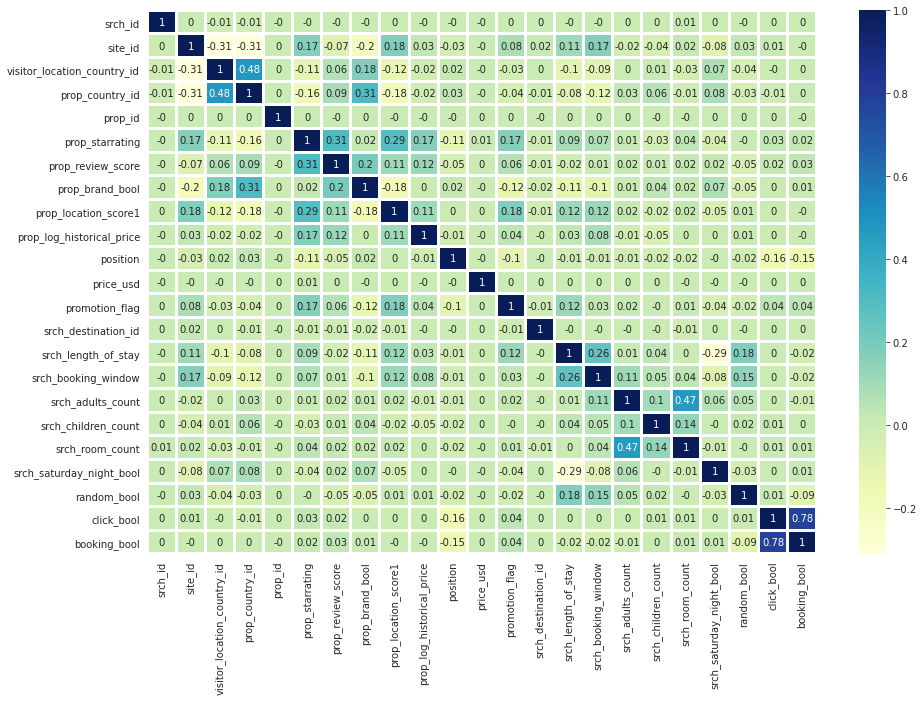

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(round(dataset.corr(), 2), cmap="YlGnBu", ax=ax, linewidths=2, annot=True)

In [ ]:
grouped_dataset = split_dataset[0].groupby("srch_id")
group_1 = grouped_dataset.get_group(1)
group_1

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,4.95,27,104.77,0,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,5.03,26,170.74,0,23246,1,0,4,0,1,1,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,4.92,21,179.80,0,23246,1,0,4,0,1,1,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,4.39,34,602.77,0,23246,1,0,4,0,1,1,1,0,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,4.93,4,143.58,0,23246,1,0,4,0,1,1,1,0,0
5,1,2013-04-04 08:32:15,12,187,219,30184,4,4.5,1,2.77,5.20,7,195.32,0,23246,1,0,4,0,1,1,1,0,0
6,1,2013-04-04 08:32:15,12,187,219,44147,3,3.5,1,2.20,4.81,18,129.35,0,23246,1,0,4,0,1,1,1,0,0
7,1,2013-04-04 08:32:15,12,187,219,50984,2,0.0,0,1.61,4.14,35,85.37,0,23246,1,0,4,0,1,1,1,0,0
8,1,2013-04-04 08:32:15,12,187,219,53341,4,4.0,1,2.56,5.18,3,150.05,0,23246,1,0,4,0,1,1,1,0,0
9,1,2013-04-04 08:32:15,12,187,219,56880,4,4.0,1,2.83,5.15,10,280.69,0,23246,1,0,4,0,1,1,1,0,0


Add the score to the dataset

In [ ]:
#Add the score 
group_1["score"] = np.where(group_1['click_bool'] == 1, 1, 0)
group_1["score"] = np.where(group_1['booking_bool'] == 1, 5, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
group_1

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool,score
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,4.95,27,104.77,0,23246,1,0,4,0,1,1,1,0,0,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,5.03,26,170.74,0,23246,1,0,4,0,1,1,1,0,0,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,4.92,21,179.80,0,23246,1,0,4,0,1,1,1,0,0,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,4.39,34,602.77,0,23246,1,0,4,0,1,1,1,0,0,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,4.93,4,143.58,0,23246,1,0,4,0,1,1,1,0,0,0
5,1,2013-04-04 08:32:15,12,187,219,30184,4,4.5,1,2.77,5.20,7,195.32,0,23246,1,0,4,0,1,1,1,0,0,0
6,1,2013-04-04 08:32:15,12,187,219,44147,3,3.5,1,2.20,4.81,18,129.35,0,23246,1,0,4,0,1,1,1,0,0,0
7,1,2013-04-04 08:32:15,12,187,219,50984,2,0.0,0,1.61,4.14,35,85.37,0,23246,1,0,4,0,1,1,1,0,0,0
8,1,2013-04-04 08:32:15,12,187,219,53341,4,4.0,1,2.56,5.18,3,150.05,0,23246,1,0,4,0,1,1,1,0,0,0
9,1,2013-04-04 08:32:15,12,187,219,56880,4,4.0,1,2.83,5.15,10,280.69,0,23246,1,0,4,0,1,1,1,0,0,0


Benchmarks

In [ ]:
def simple_benchmarks(searcher_id, property_id, score, benchmark="simple", seed=1):
    """
    A functions that creates two simple benchmarks:
    - simple: returns the ranking based on the order in which the property is found in the dataset
    - random: returns the ranking based on a random order
    """

    #Creates a list of tuples with the searcher id and property id
    id_and_property = list(zip(searcher_id, property_id, score))

    #If the simple benchmark is selected then the list of tuples will remain unchanged 
    #only the name of the file where the prediction will be saved will change
    if benchmark == "simple":
        path = "predictions/simple_benchmark.csv"

    #If the simple benchmark is selected then the list of tuples will be shuffled in a random order
    #and the name of the file where the prediction will be saved will change
    if benchmark == "random":
        np.random.seed(seed)
        np.random.shuffle(id_and_property)
        path = "predictions/random_benchmark.csv"

    #Create a list only with the searcher id and property id
    result = [element[:2] for element in id_and_property]

    #Save the prediction based on the order of the tuples in the list and the specified name of the file
    writer = csv.writer(open(path, "w"), lineterminator="\n")
    writer.writerow(("SearchId", "PropertyId"))
    writer.writerows(result)

    return id_and_property

In [ ]:
#Run the simple benchmark for both cases
simple_benchmarks(group_1['srch_id'], group_1['prop_id'], group_1['score'])
simple_benchmarks(group_1['srch_id'], group_1['prop_id'], group_1['score'], benchmark="random")

[(1, 111000, 0),
 (1, 88127, 0),
 (1, 89073, 0),
 (1, 95166, 0),
 (1, 81437, 0),
 (1, 27348, 0),
 (1, 97247, 0),
 (1, 59267, 0),
 (1, 95307, 0),
 (1, 29604, 0),
 (1, 21315, 0),
 (1, 107872, 0),
 (1, 44147, 0),
 (1, 88218, 0),
 (1, 74474, 0),
 (1, 50984, 0),
 (1, 111106, 0),
 (1, 10404, 0),
 (1, 88096, 0),
 (1, 893, 0),
 (1, 85728, 0),
 (1, 122844, 0),
 (1, 114766, 0),
 (1, 56880, 0),
 (1, 53341, 0),
 (1, 68914, 5),
 (1, 59526, 0),
 (1, 30184, 0)]

In [ ]:
def complex_benchmarks(searcher_id, property_id, review, price, score, benchmark="review"):
    """
    A functions that creates tree complex benchmarks:
    - review: returns the ranking based on the review score for each property, from highest to the lowest
    - price: returns the ranking based on the price of the property, from lowest to the highest
    - both: returns the ranking based on the review score and the price of the property, price(lowest->highest), review(highest->lowest)
    """
    #Creates a list of tuples that contain the searcher id, proerty id, score, review score and property price
    id_and_property = list(zip(searcher_id, property_id, score, review, price))

    #Sorts the ids based on the review score of each property, from highest ot the lowest
    #Set the path where the prediction will be saved
    if benchmark == "review":
        id_and_property.sort(key=lambda i: i[3], reverse=True)
        path = "predictions/review_benchmark.csv"

    #Sorts the ids based on the price of each property, from lowes to the highest
    #Set the path where the prediction will be saved
    if benchmark == "price":
        id_and_property.sort(key=lambda i: i[4])
        path = "predictions/price_benchmark.csv"

    #Sorts the ids based on the price and review score of each property
    #Set the path where the prediction will be saved
    if benchmark == "both":
        #Obtain the maximum price and review score to normalize the data
        max_review = max(id_and_property, key=lambda i:i[3])[3]
        max_price = max(id_and_property, key=lambda i:i[4])[4]

        #Creates a list of all the scores for each property, the review has a direct influence over the calc_score (the higher the review the higher the calc_score),
        #while the price has indirect influence over the calc_score (the higher the price the smaller the calc_score)
        calc_score = [(element[3] / max_review) + (1 / (element[4] / max_price)) for element in id_and_property]

        #Creates a list of tuples with the searcher id, property id and the score
        id_and_property = list(zip(searcher_id, property_id, score, calc_score))

        #Sorts the ids based on the score, from highest to the lowest
        id_and_property.sort(key=lambda i: i[3], reverse=True)
        path = "predictions/both_benchmark.csv"
    
    #Create a list only with the searcher id and property id
    result = [element[:3] for element in id_and_property]

    #Save the prediction based on the order of the tuples in the list and the specified name of the file
    writer = csv.writer(open(path, "w"), lineterminator="\n")
    writer.writerow(("SearchId", "PropertyId"))
    writer.writerows(result)

    id_and_property = [element[:3] for element in id_and_property]
    return id_and_property

In [ ]:
#Run the complex benchmark for the tree cases
review_scores = complex_benchmarks(group_1['srch_id'], group_1['prop_id'], group_1['prop_review_score'], group_1['price_usd'], group_1['score'])
price_scores = complex_benchmarks(group_1['srch_id'], group_1['prop_id'], group_1['prop_review_score'], group_1['price_usd'], group_1['score'], benchmark="price")
both_scores = complex_benchmarks(group_1['srch_id'], group_1['prop_id'], group_1['prop_review_score'], group_1['price_usd'], group_1['score'], benchmark="both")

Calculate the accuracy of the model

In [ ]:
from sklearn.metrics import ndcg_score

In [ ]:
def calculate_dcg(scores):
    i = np.arange(len(scores))
    return sum(scores / np.log2(i+2))

In [ ]:
def calculate_ndcg(id_property_score):
    score = [element[2] for element in id_property_score]
    ordered_score = sorted(score, reverse=True)

    dcg = calculate_dcg(score)
    idcg = calculate_dcg(ordered_score)
    ndcg_score([ordered_score], [score])
    return dcg/idcg

In [ ]:
calculate_ndcg(price_scores)

0.5